In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob('Datasets/Train/*')

In [6]:
x = Flatten()(vgg.output)

In [7]:

prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 1217 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 220 images belonging to 2 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 1167s 119s/step - loss: 0.8647 - accuracy: 0.6461 - val_loss: 0.9135 - val_accuracy: 0.5545
Epoch 2/10
10/10 [==============================] - 724s 73s/step - loss: 0.4219 - accuracy: 0.8190 - val_loss: 0.6514 - val_accuracy: 0.6591
Epoch 3/10
10/10 [==============================] - 721s 73s/step - loss: 0.3093 - accuracy: 0.8673 - val_loss: 0.4850 - val_accuracy: 0.7818
Epoch 4/10
10/10 [==============================] - 2502s 270s/step - loss: 0.2188 - accuracy: 0.9100 - val_loss: 0.3878 - val_accuracy: 0.8273
Epoch 5/10
10/10 [==============================] - 743s 73s/step - loss: 0.2011 - accuracy: 0.9160 - val_loss: 0.4113 - val_accuracy: 0.8182
Epoch 6/10
10/10 [==============================] - 720s 72s/step - loss: 0.1945 - accuracy: 0.9246 - val_loss: 0.3536 - val_accuracy: 0.8455
Epoch 7/10
10/10 [==============================] - 1257s 132s/step - loss: 0.1487 - accuracy: 0.9492 - val_loss: 0.3068 - val_accuracy: 0.8818


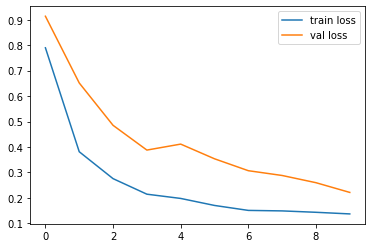

<Figure size 432x288 with 0 Axes>

In [15]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

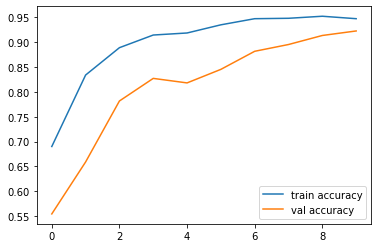

<Figure size 432x288 with 0 Axes>

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [17]:
import tensorflow as tf

from keras.models import load_model

model.save('brain_model_vgg19.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[6.38977885e-02, 9.36102152e-01],
       [6.16591750e-03, 9.93834138e-01],
       [1.94958858e-02, 9.80504155e-01],
       [9.85539079e-01, 1.44609492e-02],
       [8.97875965e-01, 1.02124102e-01],
       [4.87287715e-02, 9.51271176e-01],
       [3.81743023e-03, 9.96182501e-01],
       [8.80988687e-02, 9.11901176e-01],
       [9.80689228e-01, 1.93107352e-02],
       [9.87400711e-01, 1.25992727e-02],
       [9.47719574e-01, 5.22804782e-02],
       [3.83841604e-01, 6.16158485e-01],
       [9.89536289e-03, 9.90104616e-01],
       [3.62870209e-02, 9.63712990e-01],
       [7.60749936e-01, 2.39250034e-01],
       [3.58926342e-03, 9.96410787e-01],
       [2.31243744e-02, 9.76875663e-01],
       [3.13049138e-01, 6.86950803e-01],
       [1.89820945e-01, 8.10179055e-01],
       [8.54674041e-01, 1.45325929e-01],
       [9.92938697e-01, 7.06129381e-03],
       [9.84812260e-01, 1.51877217e-02],
       [9.95851874e-01, 4.14814195e-03],
       [6.66973088e-03, 9.93330300e-01],
       [6.899275

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=0)

In [21]:
y_pred

array([54, 92], dtype=int64)

In [22]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

OSError: SavedModel file does not exist at: model_resnet50.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
img=image.load_img('Datasets/Test/Autistic/002.jpg',target_size=(224,224))

In [ ]:

x=image.img_to_array(img)
x